1\. **Hurricanes per Year**

The number of hurricanes in 2005 was 15. The historic average is 6.3. Is the 2005 number of hurricanes signficantly larger than the other years?
- Assume the number of hurricanes is random, i.e. follows the Poisson distribution.
- Assume as statistically significant a probability that has a Z score of 2 or larger with respect a normal distribution, or equivalently a level of significance of 0.022.

**Hint**: compute the probability that in a single year are observed 15 or more hurricances.

In [75]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import curve_fit
from scipy.stats import chi2
import pandas as pd


In [2]:

# Given data
observed_hurricanes = 15
historic_average = 6.3

# Calculate the probability of observing 15 or more hurricanes in a single year
poisson_probability = 1 - stats.poisson.cdf(observed_hurricanes - 1, historic_average)

# Set the significance level
alpha = 0.022

# Check if the probability is less than alpha
if poisson_probability > alpha:
    print("Fail to reject the null hypothesis. There is not enough evidence to conclude that the number of hurricanes in 2005 is significantly different from the historic average.")
else:
    print("Reject the null hypothesis. The number of hurricanes in 2005 is significantly larger than the historic average.")


Reject the null hypothesis. The number of hurricanes in 2005 is significantly larger than the historic average.


2\. **Pairwise t-test**

In an experiment, a group of 10 individuals agreed to participate in a study of blood pressure changes following exposure to halogen lighting. Resting systolic blood pressure was recorded for each individual. The participants were then exposed to 20 minutes in a room lit only by halogen lamps. A post-exposure systolic blood pressure reading was recorded for each individual. The results are presented in the following data set:

```python
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
```

Determine whether the change in blood pressures within our sample was statistically significant.

**Hint:**
in this case, the Student's $t$-test should be performed to compare the two datasets.
Use the following test statistics:

$$T = \frac{\bar{x}_1 - \bar{x}_2}{\sigma \sqrt{\frac{2}{n}}}$$

and

$$\sigma = \sqrt{\frac{\sigma_1^2 + \sigma_2^2}{2}}$$

T = -3.786997938137629


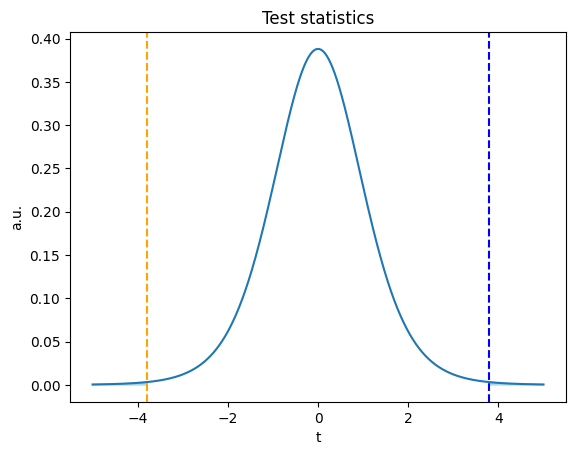

p-value = 0.004302464132864604
Reject the null hypothesis. The change in blood pressures is statistically significant.


In [14]:
# Given data
pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])
n = pre.shape[0]
sigma_pre = np.std(pre, ddof=1)
sigma_post = np.std(post, ddof=1)

sigma = np.sqrt((sigma_pre**2 + sigma_post**2)/2)

T = (pre.mean() - post.mean()) / (sigma*np.sqrt(2/n))

print("T =", T)

# plot the test statistics and its pdf
xs = np.linspace(-5, +5, 1000)
ts = stats.t.pdf(xs, n - 1)
plt.plot(xs, ts)
plt.fill_between(xs, ts, where=np.abs(xs) > np.abs(T), color='lightblue')
plt.axvline(T, linestyle='--', color='orange')
plt.axvline(-T, linestyle='--', color='blue')
plt.title("Test statistics")
plt.ylabel("a.u.")
plt.xlabel("t")
plt.show()

# now we calculate the p-value. Since it's double sided:
pvalue = stats.t.cdf(T, n - 1) + (1. - stats.t.cdf(-T, n - 1))
print("p-value =", pvalue)
# Check for significance at a significance level of 0.05
alpha = 0.05
if pvalue < alpha:
    print('Reject the null hypothesis. The change in blood pressures is statistically significant.')
else:
    print('Fail to reject the null hypothesis. There is not enough evidence to conclude a significant change in blood pressures.')

3\. **Curve fitting of temperature in Alaska**

The temperature extremes in Alaska for each month, starting in January, are given by (in degrees Celcius):

max:  `17,  19,  21,  28,  33,  38, 37,  37,  31,  23,  19,  18`

min: `-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58`

* Plot these temperatures.
* Find a suitable a function that can describe min and max temperatures.
* Fit this function to the data with `scipy.optimize.curve_fit()`.
* Plot the result. Is the fit reasonable? If not, why?
* Is the time offset for min and max temperatures the same within the fit accuracy?

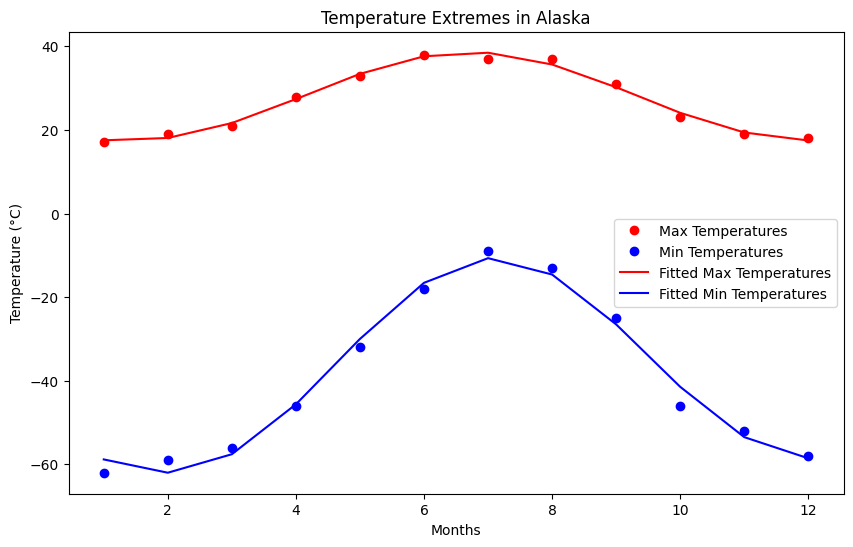

Time Offset Difference: 3.702339235132011


In [17]:
# Given data
months = np.arange(1, 13)
max_temps = np.array([17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18])
min_temps = np.array([-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58])

# Define a suitable function that can describe min and max temperatures
def temp_function(x, a, b, c, d, e, f):
    return a * (np.sin(b * x + c) + np.cos(d * x + e)) + f

# Fit the function to the data using curve_fit
popt_max, pcov_max = curve_fit(temp_function, months, max_temps)
popt_min, pcov_min = curve_fit(temp_function, months, min_temps)

# Generate y values for the fitted functions
fit_max = temp_function(months, *popt_max)
fit_min = temp_function(months, *popt_min)

# Plot the original data and the fitted functions
plt.figure(figsize=(10, 6))
plt.plot(months, max_temps, 'ro', label='Max Temperatures')
plt.plot(months, min_temps, 'bo', label='Min Temperatures')
plt.plot(months, fit_max, 'r-', label='Fitted Max Temperatures')
plt.plot(months, fit_min, 'b-', label='Fitted Min Temperatures')

plt.title('Temperature Extremes in Alaska')
plt.xlabel('Months')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

# Check if the time offset for min and max temperatures is the same within the fit accuracy
time_offset_diff = abs(popt_max[2] - popt_min[2])

print(f'Time Offset Difference: {time_offset_diff}')


4\. **Fit the residues**

Read the `data/residuals_261.pkl` file. If you haven't got it already, download it from here:

```bash
wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/
```

The feature named `residual` contains the residuals (defined as $y_i - \hat{y}_i$) of a linear regression as a function of the independent variable `distances`.

- Considering only the "residual" feature, create an histogram with the appropriate binning and plot it.
- Set the appropriate Poisson uncertainty for each bin (thus, for each bin, $\sigma_i = \sqrt{n_i}$, where $n_i$ is the number of entries in each bin)
- By looking at the distribution of the residuals, define an appropriate function and fit it to the histogram of the residuals
- Perform the $\chi^2$ goodness-of-fit test. What is the p-value of the fit? Is the fit function appropriate to describe the data?

In [2]:
!wget https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl -P data/

--2024-01-15 13:24:40--  https://www.dropbox.com/s/3uqleyc3wyz52tr/residuals_261.pkl
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/3uqleyc3wyz52tr/residuals_261.pkl [following]
--2024-01-15 13:24:41--  https://www.dropbox.com/s/raw/3uqleyc3wyz52tr/residuals_261.pkl
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc589fac505d0dc794150a896293.dl.dropboxusercontent.com/cd/0/inline/CLbA7uo_LNvUAFpuPswremEmgiG1557duOnLA6YovDwblGYIoeEIjNS0tGXIa_uYxsFyTQIHfTv-sQ2DXaDGlIOpQsGPCD8ubksxfv64jyiYj1sVcWOdjhg8lFh5AUkTdyo/file# [following]
--2024-01-15 13:24:42--  https://uc589fac505d0dc794150a896293.dl.dropboxusercontent.com/cd/0/inline/CLbA7uo_LNvUAFpuPswremEmgiG1557duOnLA6YovDwblGYIoeEIjNS0tGXIa_uYxsFyTQIHfTv-sQ2DXaDGlIOpQsGPCD8ubksxfv64jy

In [3]:
df = pd.read_pickle('/content/data/residuals_261.pkl')
df = df.tolist()

df = pd.DataFrame.from_dict(df)
df.head()
print(df.shape)

(11131, 2)


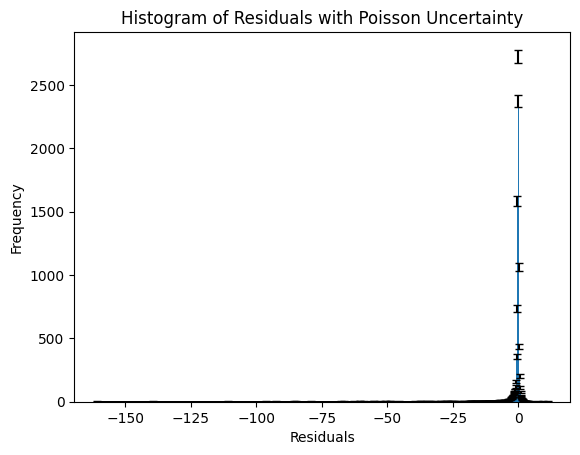

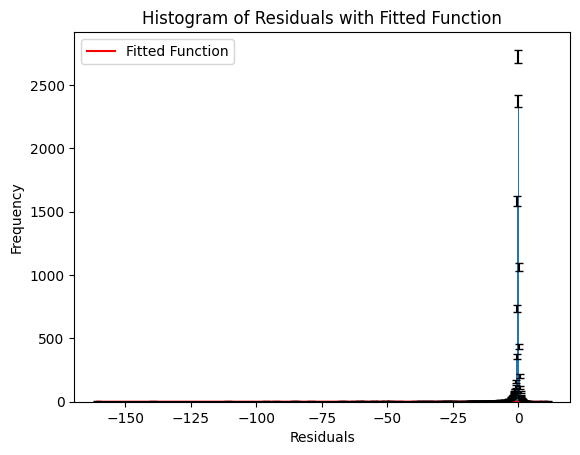

Chi-squared value: nan
Degrees of Freedom: 997
P-value of the fit: nan
The fit function is not appropriate to describe the data.


<ipython-input-20-c2a395f341dd>:38: RuntimeWarning: divide by zero encountered in divide
  chi_squared = np.sum(((hist - y_fit) / poisson_uncertainty)**2)
<ipython-input-20-c2a395f341dd>:38: RuntimeWarning: invalid value encountered in divide
  chi_squared = np.sum(((hist - y_fit) / poisson_uncertainty)**2)


In [20]:
# Create a histogram of the residuals with Poisson uncertainty
hist, bin_edges = np.histogram(df['residuals'], bins=1000)
bin_centers = 0.5 * (bin_edges[1:] + bin_edges[:-1])
poisson_uncertainty = np.sqrt(hist)

# Plot the histogram
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], yerr=poisson_uncertainty, capsize=3, align='center')
plt.title('Histogram of Residuals with Poisson Uncertainty')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.show()

# Define an appropriate function to fit to the histogram
def fit_function(x, a, b, c):
    return a * np.exp(-0.5 * ((x - b) / c)**2)

# Fit the function to the histogram
popt, pcov = curve_fit(fit_function, bin_centers, hist, sigma=poisson_uncertainty, absolute_sigma=True)

# Plot the fitted function
x_fit = np.linspace(min(bin_centers), max(bin_centers), 1000)
y_fit = fit_function(x_fit, *popt)
plt.plot(x_fit, y_fit, label='Fitted Function', color='red')
plt.bar(bin_centers, hist, width=bin_edges[1] - bin_edges[0], yerr=poisson_uncertainty, capsize=3, align='center')
plt.title('Histogram of Residuals with Fitted Function')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Perform the χ2 goodness-of-fit test
chi_squared = np.sum(((hist - y_fit) / poisson_uncertainty)**2)
dof = len(hist) - len(popt)  # degrees of freedom
p_value = 1 - chi2.cdf(chi_squared, dof)

# Output the results
print(f'Chi-squared value: {chi_squared}')
print(f'Degrees of Freedom: {dof}')
print(f'P-value of the fit: {p_value}')

# Check if the fit is appropriate
if p_value > 0.05:
    print('The fit function is appropriate to describe the data.')
else:
    print('The fit function is not appropriate to describe the data.')


unfortunaly the function is not a good fit based on P-value.

5\. **Temperatures in Munich**

Get the following data file:

```bash
https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
```

which gives the temperature in Munich every day for several years.


Fit the following function to the data:

$$f(t) = a \cos(2\pi t + b)+c$$

where $t$ is the time in years.

- Make a plot of the data and the best-fit model in the range 2008 to 2012.

   - What are the best-fit values of the parameters and thier uncertainties?

   - What is the overall average temperature in Munich, and what are the typical daily average values predicted by the model for the coldest and hottest time of year?

   - What is the meaning of the $b$ parameter, and what physical sense does it have? Describe it with a comment in the code.


- **Optional:** Now fit the data with the function $g(x)$, which has 1 more parameter than $f(x)$.
$$g(x) = a \cos(2\pi b t + c)+d$$
   - What are the RSS for $f(x)$ and $g(x)$?
   - Use the Fisher F-test to determine whether the additional parameter is motivated.

In [21]:
! wget https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt

--2024-01-15 14:00:52--  https://www.dropbox.com/s/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Resolving www.dropbox.com (www.dropbox.com)... 162.125.80.18, 2620:100:601f:18::a27d:912
Connecting to www.dropbox.com (www.dropbox.com)|162.125.80.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt [following]
--2024-01-15 14:00:53--  https://www.dropbox.com/s/raw/7gy9yjl00ymxb8h/munich_temperatures_average_with_bad_data.txt
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc0bee0840859b4d5d5be37942e5.dl.dropboxusercontent.com/cd/0/inline/CLZIQXNv_bLHtami4oCF4HHUilbFKWoC-qrnL4ILXzhyxqA3uLS04TRQFMR7m_Yi3e8MEkzUaIEd8KgQK-L75vxWmUg6bxvWwgZDJ_7YOkPskps8QKKsm3ILqqHkIk34rM4/file# [following]
--2024-01-15 14:00:54--  https://uc0bee0840859b4d5d5be37942e5.dl.dropboxusercontent.com/cd/0/inline/CLZIQXNv_bLHtami4oCF4H

<Axes: xlabel='date'>

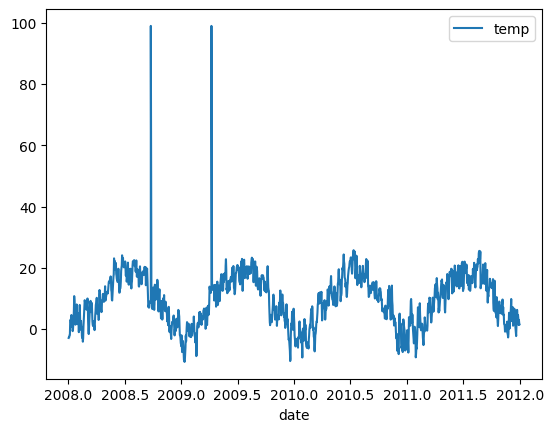

In [27]:
df= pd.read_csv('/content/munich_temperatures_average_with_bad_data.txt',names=["date", "temp"],sep=' ')
df_selected= df[df['date']>2008]
df_selected= df_selected[df_selected['date']<2012]
df_selected.plot('date','temp')

parameters:
 [9.98813367 2.90824505 9.38411487]
covariance matrix:
 [[ 3.22599218e-02  1.58660283e-07  5.53249459e-08]
 [ 1.58660283e-07  3.23390882e-04 -2.22776711e-08]
 [ 5.53249459e-08 -2.22776711e-08  1.61303439e-02]]
A = 9.99 +- 0.18
f = 2.91 +- 0.02


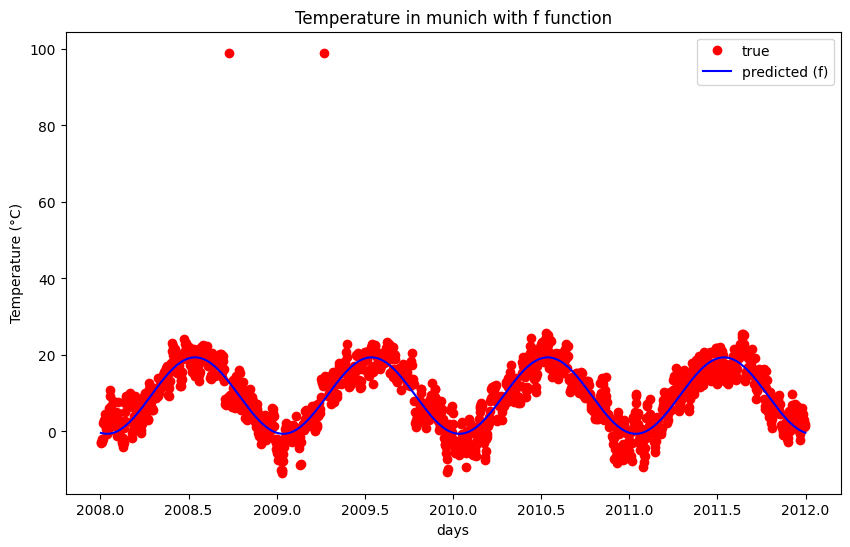

In [70]:
def f(x, a,b,c):
    return a*np.cos(2*np.pi*x + b )+c

popt_f, pcov = curve_fit(f,df_selected['date'].to_numpy(), df_selected['temp'].to_numpy(), p0=[2, 2,1], full_output=False,method='trf')
print("parameters:\n", popt_f)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt_f[0], np.sqrt(pcov[0,0])))
print("f = %.2f +- %.2f" % (popt_f[1], np.sqrt(pcov[1,1])))

f_predicted_temps = f(df_selected['date'].to_numpy(),*popt_f)
true_temps = df_selected['temp'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(df_selected['date'].to_numpy(), true_temps, 'ro', label='true')
plt.plot(df_selected['date'].to_numpy(), f_predicted_temps, 'b-', label='predicted (f)')

plt.title('Temperature in munich with f function')
plt.xlabel('days')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [65]:
min_predicted , max_predicted = f_predicted_temps.min(), f_predicted_temps.max()
min_true , max_true = true_temps.min(), true_temps.max()

print(f'min predicted tempeture {min_predicted} vs min true tempeture {min_true}')

print(f'max predicted tempeture {max_predicted} vs max true tempeture {max_true}')

min predicted tempeture -0.6037388729014044 vs min true tempeture -10.7778
max predicted tempeture 19.37219555366671 vs max true tempeture 99.0


the **b** parameter mean how much movement along **x** axes we allow our function to do.

parameters:
 [ 2.00000003e+00 -7.91870621e-05  9.99999994e-01  1.00000003e+00]
covariance matrix:
 [[ 3.55908893e+13  6.96387356e+08 -8.79585603e+12 -3.55925442e+13]
 [ 6.96387356e+08  1.50197870e+04 -1.89712777e+08 -6.96423062e+08]
 [-8.79585603e+12 -1.89712777e+08  2.39623496e+12  8.79630702e+12]
 [-3.55925442e+13 -6.96423062e+08  8.79630702e+12  3.55941993e+13]]
A = 2.00 +- 5965810.03
f = -0.00 +- 122.56


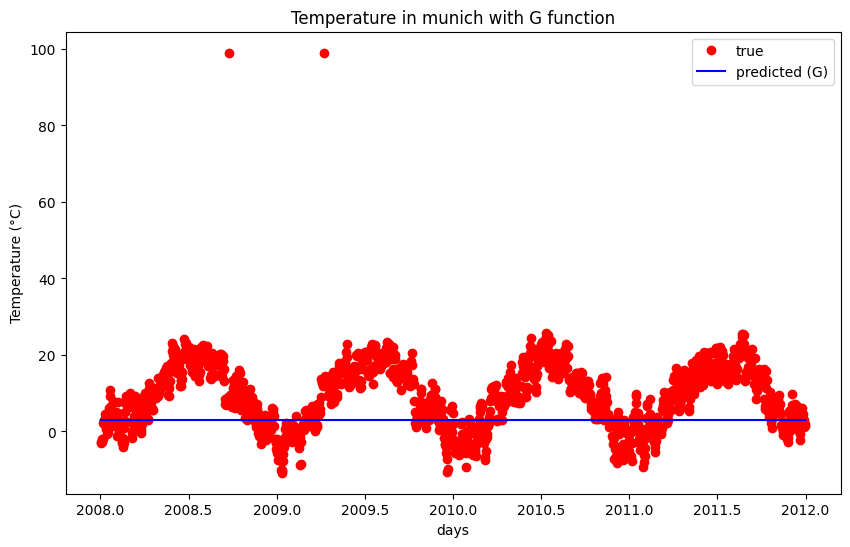

In [71]:
def g(x, a,b,c,d):
  return a*np.cos(2*np.pi*b*x + c )+d

popt_g, pcov = curve_fit(g,df_selected['date'].to_numpy(), df_selected['temp'].to_numpy(), p0=[2, 0,1,1], full_output=False,method='trf')
print("parameters:\n", popt_g)
print("covariance matrix:\n", pcov)
print("A = %.2f +- %.2f" % (popt_g[0], np.sqrt(pcov[0,0])))
print("f = %.2f +- %.2f" % (popt_g[1], np.sqrt(pcov[1,1])))

g_predicted_temps = g(df_selected['date'].to_numpy(),*popt_g)
true_temps = df_selected['temp'].to_numpy()

plt.figure(figsize=(10, 6))
plt.plot(df_selected['date'].to_numpy(), true_temps, 'ro', label='true')
plt.plot(df_selected['date'].to_numpy(), g_predicted_temps, 'b-', label='predicted (G)')

plt.title('Temperature in munich with G function')
plt.xlabel('days')
plt.ylabel('Temperature (°C)')
plt.legend()
plt.show()

In [68]:
min_predicted , max_predicted = g_predicted_temps.min(), g_predicted_temps.max()
min_true , max_true = true_temps.min(), true_temps.max()

print(f'min predicted tempeture {min_predicted} vs min true tempeture {min_true}')

print(f'max predicted tempeture {max_predicted} vs max true tempeture {max_true}')

min predicted tempeture 2.9999989217586904 vs min true tempeture -10.7778
max predicted tempeture 3.000000054283764 vs max true tempeture 99.0


In [69]:
rss_f = np.sum((true_temps - f_predicted_temps)**2)
rss_g = np.sum((true_temps - g_predicted_temps)**2)
print(f'RSS for f : {rss_f}')
print(f'RSS for g : {rss_g}')

RSS for f : 34359.85859996652
RSS for g : 166783.87486343153


In [72]:
df_f = len(true_temps) - len(popt_f)
df_g = len(true_temps) - len(popt_g)

f_statistic = ((rss_f - rss_g) / (df_g - df_f)) / (rss_g / df_g)

# Calculate the p-value from the F-distribution
p_value = 1 - stats.f.cdf(f_statistic, df_g - df_f, df_f)

# Compare the p-value to a chosen significance level (e.g., 0.05)
alpha = 0.05
if p_value < alpha:
    print('Reject the null hypothesis. The additional parameter is motivated.')
else:
    print('Fail to reject the null hypothesis. The simpler model is sufficient.')

Fail to reject the null hypothesis. The simpler model is sufficient.
